In [11]:
import requests
import xml.etree.ElementTree as ET

from LoadingData import LoadFromAPI
import os
import pandas as pd
import numpy as np

## Air Quality API: 空气质量接口：

help网页： [https://api.erg.ic.ac.uk/AirQuality/help](https://api.erg.ic.ac.uk/AirQuality/help)

### Air Quality - MonitoringLocalAuthority

In [2]:
LoadFromAPI.load_data_from_api(url='https://api.erg.ic.ac.uk/AirQuality/Information/MonitoringLocalAuthority/GroupName=London', data_format="xml", filename="Data/AirQuality/MonitoringLocalAuthority.xml")

Data saved to Data/AirQuality/MonitoringLocalAuthority.xml.


In [7]:
# 解析xml文件并且提取有用信息，存储到dataframe中并且保存到csv文件中


tree = ET.parse('Data/AirQuality/MonitoringLocalAuthority.xml')
root = tree.getroot()

Autho_data = []
for record in root.findall('LocalAuthority'):
    name = record.get('LocalAuthorityName')
    code = record.get('LocalAuthorityCode')
    latitude = record.get('LaCentreLatitude')
    longitude = record.get('LaCentreLongitude')
    Autho_data.append([name, code])

Autho_df = pd.DataFrame(Autho_data, columns=['LocalAuthorityName', 'LocalAuthorityCode'])

### Air Quality - MonitoringSites

In [ ]:
#url = http://api.erg.ic.ac.uk/AirQuality/Information/MonitoringSites/GroupName={GROUPNAME}

In [12]:
LoadFromAPI.load_data_from_api(url='http://api.erg.ic.ac.uk/AirQuality/Information/MonitoringSites/GroupName=London', data_format="xml", filename="Data/AirQuality/MonitoringSites.xml")

Data saved to Data/AirQuality/MonitoringSites11.xml.


In [ ]:
# 您的XML文件路径

# 解析XML文件
tree = ET.parse('Data/AirQuality/MonitoringSites.xml')
root = tree.getroot()

# 提取数据
data = []
for site in root.findall('Site'):
    # 获取属性
    local_authority_code = site.get('LocalAuthorityCode')
    local_authority_name = site.get('LocalAuthorityName')
    site_code = site.get('SiteCode')
    site_name = site.get('SiteName')
    site_type = site.get('SiteType')
    date_opened = site.get('DateOpened')
    date_closed = site.get('DateClosed')
    latitude = site.get('Latitude')
    longitude = site.get('Longitude')
    
    # 将提取的数据添加到列表中
    data.append({
        'LocalAuthorityCode': local_authority_code,
        'LocalAuthorityName': local_authority_name,
        'SiteCode': site_code,
        'SiteName': site_name,
        'SiteType': site_type,
        'DateOpened': date_opened,
        'DateClosed': date_closed,
        'Latitude': latitude,
        'Longitude': longitude
    })

# 创建DataFrame
AQ_Sites_df = pd.DataFrame(data)

In [8]:
# save to csv
AQ_Sites_df.to_csv('Data/AirQuality/AQ_Sites.csv', index=False)

### Air Quality - Species

In [12]:
LoadFromAPI.load_data_from_api(url='https://api.erg.ic.ac.uk/AirQuality/Information/MonitoringSiteSpecies/GroupName=London', data_format="xml", filename="Data/AirQuality/MonitoringSiteSpecies.xml")

Data saved to Data/AirQuality/MonitoringSiteSpecies.xml.


In [17]:
# Parsing the XML content
tree = ET.parse('Data/AirQuality/MonitoringSiteSpecies.xml')
root = tree.getroot()

# Collecting data into a list of dictionaries
data = []

# Iterate over each site in the XML
for site in root.findall('Site'):
    site_data = site.attrib  # Get the site attributes
    for species in site.findall('Species'):
        # Combine site data with species data for each row
        species_data = species.attrib
        row_data = {**site_data, **species_data}
        data.append(row_data)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('Data/AirQuality/MonitoringSiteSpecies.csv', index=False)

In [5]:
# Try one
LoadFromAPI.load_data_from_api(url='https://api.erg.ic.ac.uk/AirQuality/Annual/MonitoringObjective/SiteCode=BG1/StartDate=01 Jan 2020', 
                               data_format="xml", 
                               filename="Data/AirQuality/MonitoringReport_BG1_2022.xml")




Data saved to Data/AirQuality/MonitoringReport_BG1_2022.xml.


In [ ]:
https://api.erg.ic.ac.uk/AirQuality/Data/Site/Wide/SiteCode={SITECODE}/StartDate={STARTDATE}/EndDate={ENDDATE}/csv

In [17]:
LoadFromAPI.load_data_from_api(url='https://api.erg.ic.ac.uk/AirQuality/Data/Site/SiteCode=BQ7/StartDate=01 Jan 2018/EndDate=01 Jan 2021', 
                               data_format="xml", 
                               filename="Data/AirQuality/BQ7_2018_2021.xml")

Data saved to Data/AirQuality/BQ7_2018_2021.xml.


### POtential thing for air quality data

https://www.data.gov.uk/dataset/ef87da6c-0b01-4717-aab4-a076e8b8ff7e/london-atmospheric-emissions-inventory-laei-2013

# London Roads Data

[London Roads Data](https://roads.data.tfl.gov.uk/)

In [11]:
import json

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
geojson_file_path = "Data/GLA_TLRN_HAB.geojson"

# 加载GeoJSON数据
gdf = gpd.read_file(geojson_file_path)

# 打印数据帧的前几行，查看数据结构
print(gdf.head(32))

    fid  HA_ID               Borough  Version  Changed_on  \
0     5     19               BROMLEY        1  2007-08-15   
1   106     18                BEXLEY        3  2014-08-01   
2   117     16    BARKING & DAGENHAM        3  2015-05-05   
3   122     21                SUTTON        9  2015-05-05   
4   139      2                CAMDEN        6  2016-05-25   
5   147     12  KENSINGTON & CHELSEA        4  2016-05-25   
6   151     22                MERTON        7  2016-05-25   
7   152     24  RICHMOND UPON THAMES        4  2016-05-25   
8   168      5         TOWER HAMLETS        7  2016-10-24   
9   170     14             REDBRIDGE        4  2016-10-24   
10  176     26            HILLINGDON        2  2017-04-14   
11  177     28                 BRENT        3  2017-04-18   
12  183     15              HAVERING        7  2017-07-03   
13  189      6             GREENWICH        5  2018-03-16   
14  193      8             SOUTHWARK       15  2018-03-21   
15  196     20          

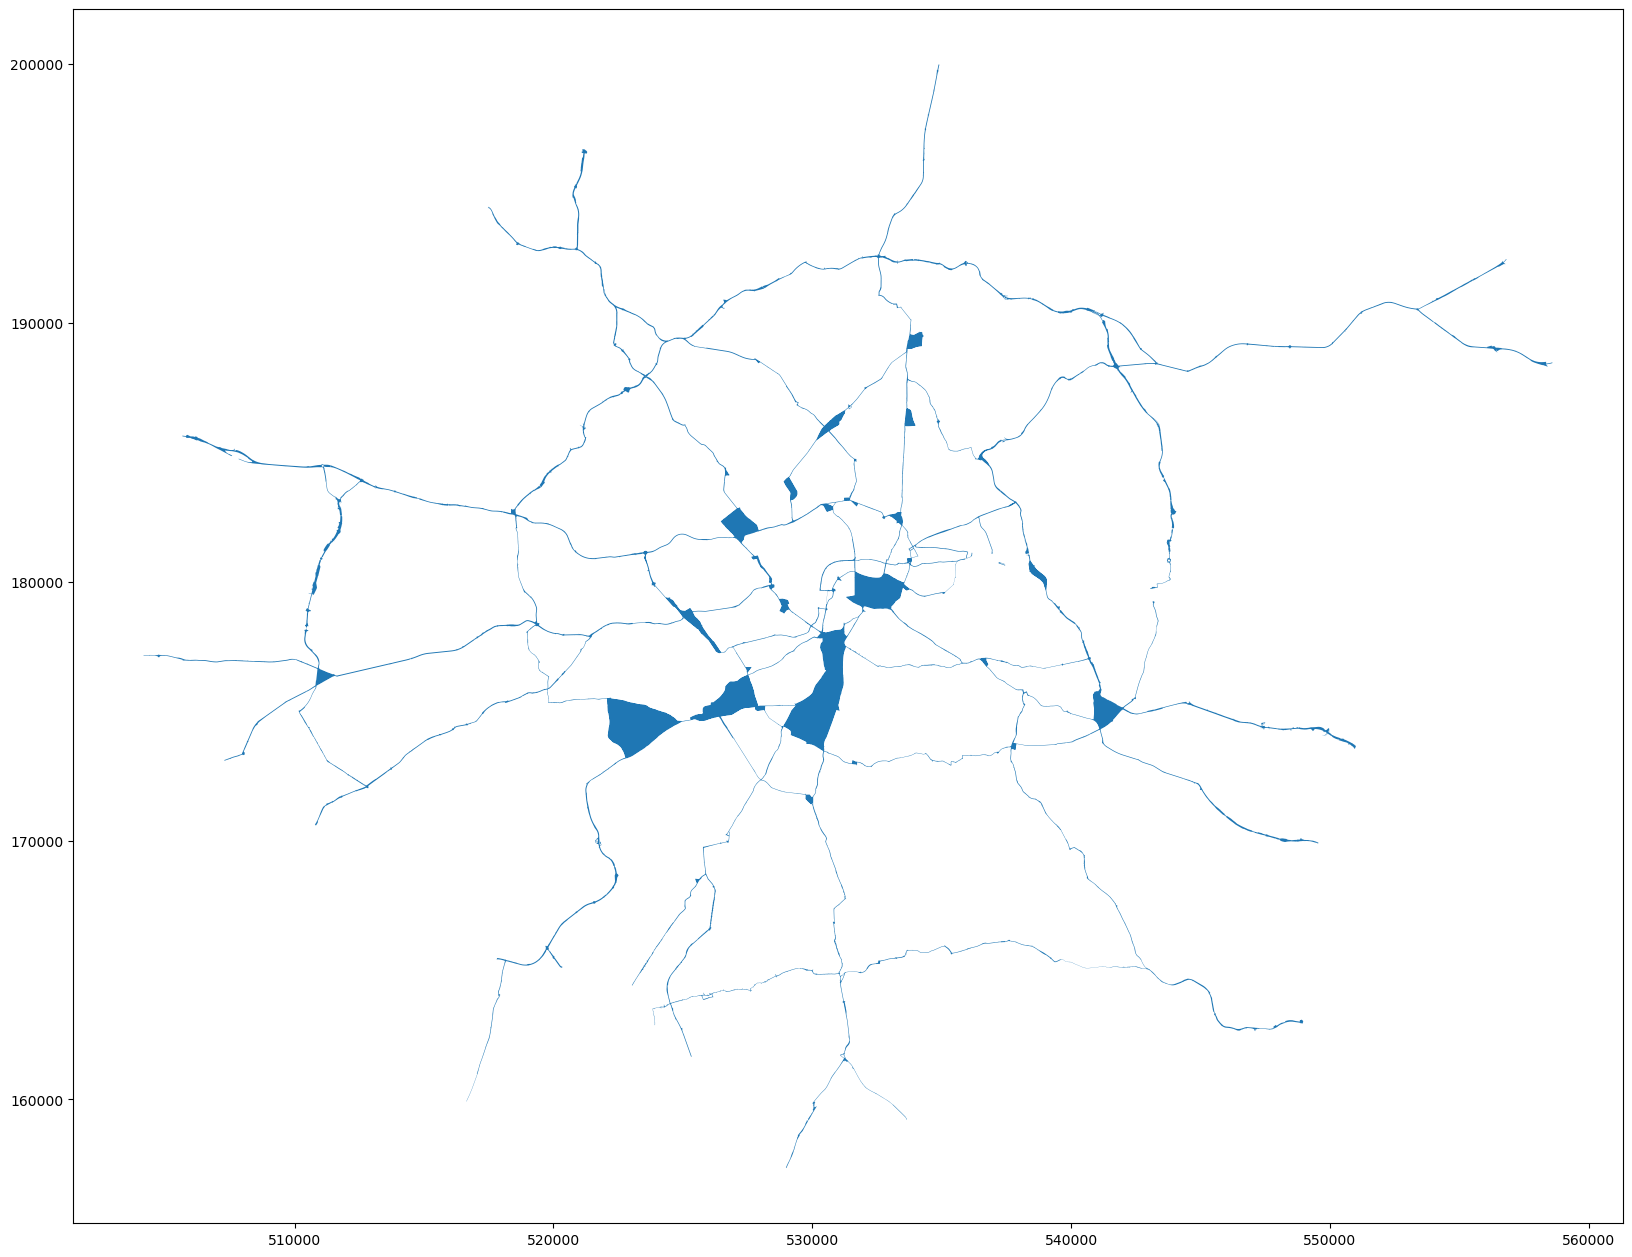

In [15]:
# 假设gdf包含一个名为'type'的列，用于区分不同类别的地理对象
gdf.plot(figsize=(20, 20))
plt.show()
